In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bri-data-hackathon-cr-optimization/sample_submission.csv
/kaggle/input/bri-data-hackathon-cr-optimization/data_description.csv
/kaggle/input/bri-data-hackathon-cr-optimization/train.csv
/kaggle/input/bri-data-hackathon-cr-optimization/test.csv


## Intro

In this notebook, I will present **a fast and straightforward automated time series model.**
I will be using the AutoTS library for this notebook, but one can find another similar library to analyze! 

**Please do upvote if you find this notebook useful and leave any comment so I can help you ;)**
**I will update the notebook accordingly.**

To learn more about AutoTS, please refer to this website: https://pypi.org/project/AutoTS/

Quoting from the website, AutoTS offer:
> 1. Finds optimal time series forecasting model and data transformations by genetic programming optimization
> 2. Twenty-two available model classes, with tens of thousands of possible hyperparameter configurations
> 3. Over thirty time-series specific data transformations
> 4. Allows automatic ensembling of best models
> 5. Multiple cross-validation options

Please keep in mind that I only use the basic option and parameters **without tuning** in this notebook. You can tune it to get a better score. You can also predict each variable then ensemble the prediction to obtain better results.

In [2]:
# Run this code to install the library
!pip install autots

     |████████████████████████████████| 381 kB 1.3 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## Load library and train data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autots import AutoTS

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("../input/bri-data-hackathon-cr-optimization/train.csv")
train = train[['periode', 'kas_kantor', 'kas_echannel']]
train['kas_kantor'].iloc[0] = train['kas_kantor'].iloc[1]
train['periode'] = pd.to_datetime(train['periode'])
# train.set_index(['periode'], inplace=True)
# train.head()

In [5]:
train.isna().sum()

periode         0
kas_kantor      0
kas_echannel    0
dtype: int64

## Initialize Model

I will forecast both `kas_kantor` and `kas_echannel` directly without any preprocessing.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler_kantor = StandardScaler()
scaler_echannel = StandardScaler()
train['kas_kantor'] = scaler_kantor.fit_transform(train[['kas_kantor']])
train['kas_echannel'] = scaler_echannel.fit_transform(train[['kas_echannel']])

In [7]:
# Add time-series models here
model_list = ['ARIMA', 'FBProphet']
model = ['ARIMA', 'FBProphet']

In [8]:
mod_kantor = AutoTS(
    forecast_length=31,
    frequency='infer',
    prediction_interval=0.9,
    ensemble='all',
    model_list=model,
    max_generations=5,
    num_validations=2,
    validation_method='even',
    n_jobs = -1
)

mod_echannel = AutoTS(
    forecast_length=31,
    frequency='infer',
    prediction_interval=0.9,
    ensemble='all',
    model_list=model_list,
    max_generations=5,
    num_validations=2,
    validation_method='even',
    n_jobs=-1
)

In [9]:
# Output is hidden
mod_kantor = mod_kantor.fit(train,
                            date_col='periode', 
                            value_col='kas_kantor', 
                            id_col=None)

mod_echannel = mod_echannel.fit(train,
                                date_col='periode', 
                                value_col='kas_echannel', 
                                id_col=None)

Inferred frequency is: D
Model Number: 1 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 1: FBProphet
Model Number: 2 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 2: FBProphet
Model Number: 3 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 3: FBProphet
Model Number: 4 with model ARIMA in generation 0 of 5
Model Number: 5 with model ARIMA in generation 0 of 5
Model Number: 6 with model ARIMA in generation 0 of 5
Model Number: 7 with model ARIMA in generation 0 of 5
Model Number: 8 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 8: FBProphet
Model Number: 9 with model FBProphe

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Model Number: 14 with model ARIMA in generation 0 of 5
Model Number: 15 with model ARIMA in generation 0 of 5
Model Number: 16 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 16: FBProphet
Model Number: 17 with model ARIMA in generation 0 of 5
Model Number: 18 with model FBProphet in generation 0 of 5
Template Eval Error: UnboundLocalError("local variable 'grouping_ids' referenced before assignment") in model 18: FBProphet
Model Number: 19 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 19: FBProphet
Model Number: 20 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 20: FBProphet
Model Number: 21 with model ARIMA in generation 0 of 5
Model Number: 22 with model ARIMA in generation 

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 52 with model ARIMA in generation 2 of 5


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 53 with model FBProphet in generation 2 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 53: FBProphet
Model Number: 54 with model FBProphet in generation 2 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 54: FBProphet
Model Number: 55 with model FBProphet in generation 2 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 55: FBProphet
Model Number: 56 with model FBProphet in generation 2 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 56: FBProphet
New Generation: 3 of 5
Model Number: 57 with model ARIMA in generation 3 of 5
Model Number: 58 with model ARIMA in generation 3 of 5
Model Number: 59 with model ARIMA in generation 3 of 5
Model Number: 60 with model FBProphet in generation 3 of 5
Template Eval Error: 

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 80 with model Ensemble in generation 0 of 0
Model Number: 81 with model Ensemble in generation 0 of 0
Model Number: 82 with model Ensemble in generation 0 of 0
Model Number: 83 with model Ensemble in generation 0 of 0


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Validation Round: 1
Model Number: 1 of 13 with model Ensemble for Validation 1
Model Number: 2 of 13 with model Ensemble for Validation 1
Model Number: 3 of 13 with model Ensemble for Validation 1
Model Number: 4 of 13 with model ARIMA for Validation 1
Model Number: 5 of 13 with model ARIMA for Validation 1
Model Number: 6 of 13 with model Ensemble for Validation 1


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 7 of 13 with model ARIMA for Validation 1
Model Number: 8 of 13 with model ARIMA for Validation 1
Model Number: 9 of 13 with model ARIMA for Validation 1
Model Number: 10 of 13 with model ARIMA for Validation 1
Model Number: 11 of 13 with model ARIMA for Validation 1
Model Number: 12 of 13 with model ARIMA for Validation 1
Model Number: 13 of 13 with model Ensemble for Validation 1


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Validation Round: 2
Model Number: 1 of 13 with model Ensemble for Validation 2


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 2 of 13 with model Ensemble for Validation 2


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 3 of 13 with model Ensemble for Validation 2
Model Number: 4 of 13 with model ARIMA for Validation 2
Model Number: 5 of 13 with model ARIMA for Validation 2
Model Number: 6 of 13 with model Ensemble for Validation 2
Model Number: 7 of 13 with model ARIMA for Validation 2
Model Number: 8 of 13 with model ARIMA for Validation 2
Model Number: 9 of 13 with model ARIMA for Validation 2
Model Number: 10 of 13 with model ARIMA for Validation 2


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 11 of 13 with model ARIMA for Validation 2
Model Number: 12 of 13 with model ARIMA for Validation 2
Model Number: 13 of 13 with model Ensemble for Validation 2
Ensembling Error: attempt to get argmin of an empty sequence
Model Number: 1 with model Ensemble in generation 0 of 0


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Inferred frequency is: D
Model Number: 1 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 1: FBProphet
Model Number: 2 with model FBProphet in generation 0 of 5
Template Eval Error: UnboundLocalError("local variable 'grouping_ids' referenced before assignment") in model 2: FBProphet
Model Number: 3 with model ARIMA in generation 0 of 5


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 4 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 4: FBProphet
Model Number: 5 with model FBProphet in generation 0 of 5
Template Eval Error: AttributeError("'RangeIndex' object has no attribute 'year'") in model 5: FBProphet
Model Number: 6 with model ARIMA in generation 0 of 5
Model Number: 7 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 7: FBProphet
Model Number: 8 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 8: FBProphet
Model Number: 9 with model ARIMA in generation 0 of 5
Model Number: 10 with model ARIMA in generation 0 of 5
Model Number: 11 with model ARIMA in generation 0 of 5
Model Number: 12 with model FBProphet in generation 0 of 5
Template Eval Err

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 14 with model ARIMA in generation 0 of 5
Model Number: 15 with model ARIMA in generation 0 of 5
Model Number: 16 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 16: FBProphet
Model Number: 17 with model ARIMA in generation 0 of 5


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Model Number: 18 with model ARIMA in generation 0 of 5
Model Number: 19 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 19: FBProphet
Model Number: 20 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 20: FBProphet
Model Number: 21 with model ARIMA in generation 0 of 5


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 22 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 22: FBProphet
Model Number: 23 with model ARIMA in generation 0 of 5
Model Number: 24 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 24: FBProphet
Model Number: 25 with model ARIMA in generation 0 of 5
Model Number: 26 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 26: FBProphet
Model Number: 27 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 27: FBProphet
Model Number: 28 with model ARIMA in generation 0 of 5
Model Number: 29 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands co

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Model Number: 35 with model FBProphet in generation 0 of 5
Template Eval Error: UnboundLocalError("local variable 'grouping_ids' referenced before assignment") in model 35: FBProphet
Model Number: 36 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 36: FBProphet
Model Number: 37 with model ARIMA in generation 0 of 5
Model Number: 38 with model ARIMA in generation 0 of 5
Model Number: 39 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 39: FBProphet
Model Number: 40 with model ARIMA in generation 0 of 5
Model Number: 41 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 41: FBProphet
New Generation: 1 of 5
Model Number: 42 with model ARIMA in generation 1 of 5
Model Number: 43 with mod

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 67 with model ARIMA in generation 4 of 5
Model Number: 68 with model ARIMA in generation 4 of 5


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 69 with model ARIMA in generation 4 of 5
Model Number: 70 with model FBProphet in generation 4 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 70: FBProphet
Model Number: 71 with model FBProphet in generation 4 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 71: FBProphet
Model Number: 72 with model FBProphet in generation 4 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 72: FBProphet
Model Number: 73 with model FBProphet in generation 4 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (62,) (31,) ') in model 73: FBProphet
New Generation: 5 of 5
Model Number: 74 with model ARIMA in generation 5 of 5
Model Number: 75 with model ARIMA in generation 5 of 5
Model Number: 76 with model ARIMA in generation 5 of 5
Model Number: 77 with mod

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 84 with model Ensemble in generation 0 of 0
Model Number: 85 with model Ensemble in generation 0 of 0
Model Number: 86 with model Ensemble in generation 0 of 0
Validation Round: 1
Model Number: 1 of 13 with model Ensemble for Validation 1


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 2 of 13 with model Ensemble for Validation 1


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 3 of 13 with model Ensemble for Validation 1
Model Number: 4 of 13 with model ARIMA for Validation 1
Model Number: 5 of 13 with model ARIMA for Validation 1
Model Number: 6 of 13 with model ARIMA for Validation 1
Model Number: 7 of 13 with model ARIMA for Validation 1


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 8 of 13 with model ARIMA for Validation 1
Model Number: 9 of 13 with model ARIMA for Validation 1
Model Number: 10 of 13 with model Ensemble for Validation 1
Model Number: 11 of 13 with model ARIMA for Validation 1
Model Number: 12 of 13 with model ARIMA for Validation 1


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 13 of 13 with model Ensemble for Validation 1


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Validation Round: 2
Model Number: 1 of 13 with model Ensemble for Validation 2
Model Number: 2 of 13 with model Ensemble for Validation 2
Model Number: 3 of 13 with model Ensemble for Validation 2
Model Number: 4 of 13 with model ARIMA for Validation 2
Model Number: 5 of 13 with model ARIMA for Validation 2
Model Number: 6 of 13 with model ARIMA for Validation 2
Model Number: 7 of 13 with model ARIMA for Validation 2
Model Number: 8 of 13 with model ARIMA for Validation 2
Model Number: 9 of 13 with model ARIMA for Validation 2
Model Number: 10 of 13 with model Ensemble for Validation 2
Model Number: 11 of 13 with model ARIMA for Validation 2
Model Number: 12 of 13 with model ARIMA for Validation 2


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Number: 13 of 13 with model Ensemble for Validation 2


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ensembling Error: attempt to get argmin of an empty sequence
Model Number: 1 with model Ensemble in generation 0 of 0


### Print the best model and make prediction

In [10]:
print(mod_kantor)

Initiated AutoTS object with best model: 
Ensemble
{}
{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"569aa7223b0e26e602732afaea7a6adb": {"Model": "Ensemble", "ModelParameters": "{\"model_name\": \"BestN\", \"model_count\": 3, \"model_metric\": \"best_score\", \"models\": {\"5d2317d128503440f491b09b65195395\": {\"Model\": \"ARIMA\", \"ModelParameters\": \"{\\\"p\\\": 12, \\\"d\\\": 1, \\\"q\\\": 1, \\\"regression_type\\\": null}\", \"TransformationParameters\": \"{\\\"outlier_method\\\": null, \\\"outlier_threshold\\\": null, \\\"outlier_position\\\": null, \\\"fillna\\\": \\\"ffill\\\", \\\"transformation\\\": \\\"PowerTransformer\\\", \\\"second_transformation\\\": \\\"PowerTransformer\\\", \\\"transformation_param\\\": null, \\\"detrend\\\": \\\"RANSAC\\\", \\\"third_transformation\\\": null, \\\"transformation_param2\\\": null, \\\"fourth_transformation\\\": null, \\\"discretization\\\": \\\"lower\\\", \\\"n_bins\\\": 10, \\\"grouping\\\": null, \\

In [11]:
print(mod_echannel)

Initiated AutoTS object with best model: 
Ensemble
{}
{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"d95c94c5fdd6378bc455a11a40418926": {"Model": "ARIMA", "ModelParameters": "{\"p\": 2, \"d\": 1, \"q\": 0, \"regression_type\": null}", "TransformationParameters": "{\"outlier_method\": null, \"outlier_threshold\": null, \"outlier_position\": null, \"fillna\": \"ffill\", \"transformation\": \"QuantileTransformer\", \"second_transformation\": \"FixedRollingMean\", \"transformation_param\": \"100thN\", \"detrend\": \"Gamma\", \"third_transformation\": \"FixedRollingMean\", \"transformation_param2\": \"14\", \"fourth_transformation\": \"PowerTransformer\", \"discretization\": null, \"n_bins\": null, \"grouping\": \"dbscan\", \"reconciliation\": \"mean\", \"coerce_integer\": false, \"context_slicer\": null}"}}, "series": {"kas_echannel": "d95c94c5fdd6378bc455a11a40418926"}}


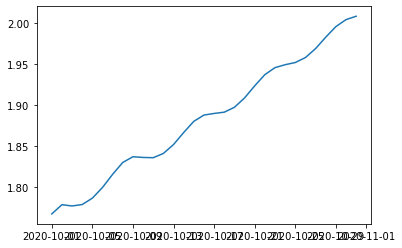

In [12]:
prediction_kantor = mod_kantor.predict()
forecast_kantor = prediction_kantor.forecast
plt.plot(forecast_kantor);

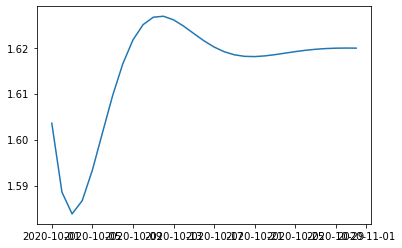

In [13]:
prediction_echannel = mod_echannel.predict()
forecast_echannel = prediction_echannel.forecast
plt.plot(forecast_echannel);

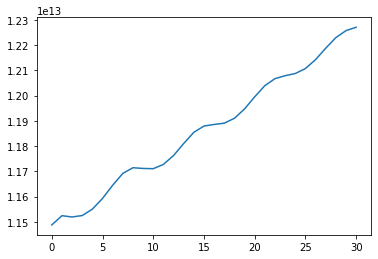

In [14]:
forecast_kantor = scaler_kantor.inverse_transform(forecast_kantor)
plt.plot(forecast_kantor);

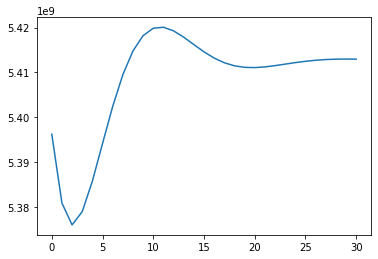

In [15]:
forecast_echannel = scaler_echannel.inverse_transform(forecast_echannel)
plt.plot(forecast_echannel);